In [2]:
import pickle

# Load X
with open('/content/drive/Othercomputers/My Laptop/D:/Cricket Players Classifier/Model/X.pkl', 'rb') as file:
    X = pickle.load(file)

# Load y
with open('/content/drive/Othercomputers/My Laptop/D:/Cricket Players Classifier/Model/y.pkl', 'rb') as file:
    y = pickle.load(file)


In [3]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0, stratify = y)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C=10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8393782383419689

In [5]:
len(X_test)

193

In [6]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90        42
           1       0.96      0.79      0.87        33
           2       0.75      0.88      0.81        24
           3       0.77      0.77      0.77        30
           4       0.97      0.97      0.97        29
           5       0.75      0.69      0.72        35

    accuracy                           0.84       193
   macro avg       0.84      0.84      0.84       193
weighted avg       0.84      0.84      0.84       193



In [7]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [8]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [9]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.824183,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.613327,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.718751,{'logisticregression__C': 1}


In [10]:
best_estimators['svm'].score(X_test,y_test)

0.8393782383419689

In [11]:
best_estimators['random_forest'].score(X_test,y_test)

0.6476683937823834

In [12]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7979274611398963

In [13]:
best_clf = best_estimators['svm']

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[40,  0,  0,  2,  0,  0],
       [ 2, 26,  0,  1,  0,  4],
       [ 1,  0, 21,  1,  1,  0],
       [ 2,  0,  2, 23,  0,  3],
       [ 0,  0,  0,  0, 28,  1],
       [ 2,  1,  5,  3,  0, 24]])

Text(70.72222222222221, 0.5, 'Truth')

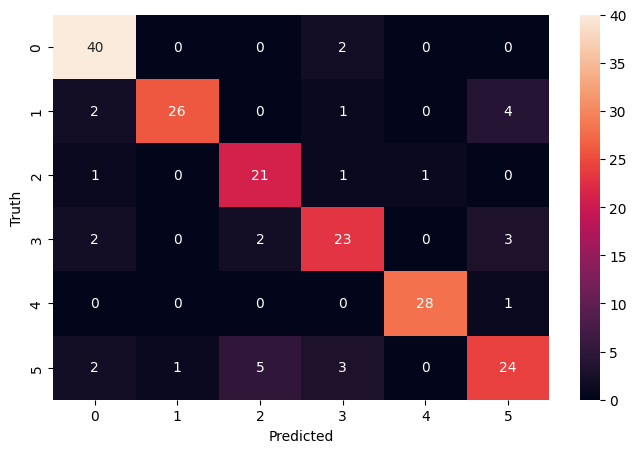

In [17]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

## Saving the model

In [18]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(best_clf, file)

## Saving the class dictionary

In [20]:
class_dict = {
    0:'imran_khan',
    1:'kapil_dev',
    2:'ms_dhoni',
    3:'shoaib_akhtar',
    4:'virat_kohli',
    5:'wasim_akram'
}



import json
with open("class_dictionary.json", "w") as f:
    f.write(json.dumps(class_dict))